In [108]:
import pygame, pygame.sndarray
import matplotlib.pyplot as plt
# def play_for(sample_wave, ms):
#     """Play the given NumPy array, as a sound, for ms milliseconds."""
#     sound = pygame.sndarray.make_sound(sample_wave)
#     sound.play(-1)
#     pygame.time.delay(ms)
#     sound.stop()
    
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [2]:
import numpy as np
import scipy.signal

sample_rate = 44100

def sine_wave(hz, peak, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    length = sample_rate / float(hz)
    omega = np.pi * 2 / length
    xvalues = np.arange(int(length)) * omega
    onecycle = peak * np.sin(xvalues)
    print('onecycle len', len(onecycle))
    return np.resize(onecycle, (n_samples,)).astype(np.int16)

def square_wave(hz, peak, duty_cycle=.5, n_samples=sample_rate):
    """Compute N samples of a sine wave with given frequency and peak amplitude.
       Defaults to one second.
    """
    t = np.linspace(0, 1, 500 * 440/hz, endpoint=False)
    wave = scipy.signal.square(2 * np.pi * 5 * t, duty=duty_cycle)
    wave = np.resize(wave, (n_samples,))
    return (peak / 2 * wave.astype(np.int16))


In [3]:
pygame.mixer.init(channels=1)

# Play A (440Hz) for 1 second as a sine wave:
play_for(sine_wave(440, 8192), 100)

play_for(sum([sine_wave(440, 4096), sine_wave(880, 4096)]), 100)

onecycle len 100
onecycle len 100
onecycle len 50


onecycle len 2205


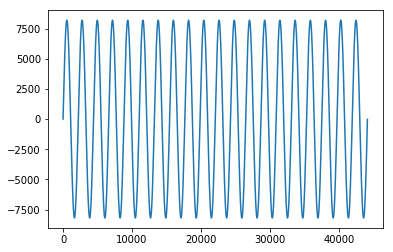

In [4]:
plt.plot(range(0,44100),sine_wave(20,8192))

onecycle len 100
onecycle len 8820


C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in short_scalars
  """Entry point for launching an IPython kernel.


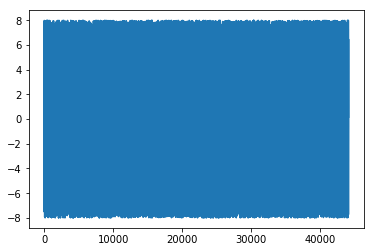

In [5]:
plt.plot(range(0,44100),[x*y/4096 for (x,y) in zip(sine_wave(440,4096),sine_wave(5,4096))])

In [6]:
sine_wave(5,1)

onecycle len 8820


array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [7]:
len(sine_wave(5,1))

onecycle len 8820


44100

In [8]:
play_for(np.array([np.int16(x*y/4096) for (x,y) in zip(sine_wave(440,4096),sine_wave(5,4096))]),1000)

onecycle len 100
onecycle len 8820


C:\Users\Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in short_scalars
  """Entry point for launching an IPython kernel.


In [9]:
play_for(sum([sine_wave(440, 4096), sine_wave(880, 4096)]), 1000)

onecycle len 100
onecycle len 50


In [10]:
len(sum([sine_wave(440, 4096), sine_wave(880, 4096)]))

onecycle len 100
onecycle len 50


44100

In [11]:
sound = pygame.sndarray.make_sound(sine_wave(1000,4096))
sound.play(-1)
pygame.time.delay(1000)
sound.stop()

onecycle len 44


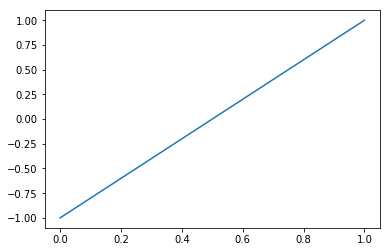

In [12]:
def f(t):
    return -1 + 2*t

plot_function(f,0,1)



In [13]:
def periodic(form,frequency=440,amplitude=1):
    period = 1/frequency
    def p(t):
        return amplitude * form((t % period)/period)
    return p

def sample(f,start,end,count):
    map_f = np.vectorize(f)
    return map_f(np.arange(start,end,1/count)).astype(np.int16)

In [14]:
sound = pygame.sndarray.make_sound(np.random.randint(8000, size=44100))
sound.play(-1)
pygame.time.delay(1000)
sound.stop()

In [15]:
np.arange(0,1,1/44100)

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [16]:
wave_func = periodic(f,1760,5000)
wave = sample(wave_func,0,1,44100)
def plot_sequence(points,max=100):
    plt.scatter(range(0,max),points[0:max])

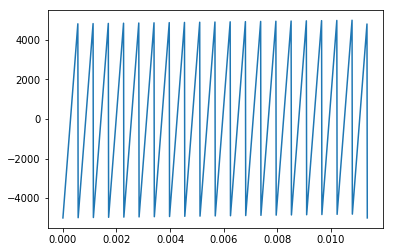

In [17]:
plot_function(wave_func,0,5/440)

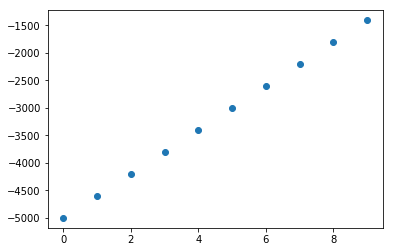

In [18]:
plot_sequence(wave,max=10)

In [19]:
sound = pygame.sndarray.make_sound(wave)
sound.play(-1)
pygame.time.delay(1000)
sound.stop()

In [20]:
wave

array([-5000, -4600, -4201, ...,  3802,  4201,  4600], dtype=int16)

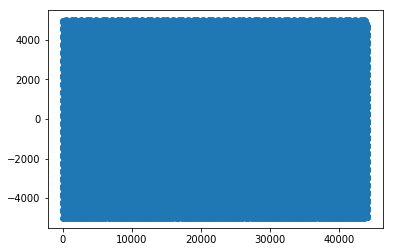

In [21]:
plt.scatter(range(0,len(wave)), wave)

In [22]:
8000 * sample(periodic(f,0.0001),0,1,44100)

array([-8000,     0,     0, ...,     0,     0,     0], dtype=int16)

In [23]:
def play_waveform(w,frequency,amplitude,duration=1000):
    p = periodic(w,frequency,amplitude)
    seq = sample(p,0,1,44100)
    sound = pygame.sndarray.make_sound(seq)
    sound.play(-1)
    pygame.time.delay(duration)
    sound.stop()

In [24]:
from math import sin,pi,cos
def s(t):
    return sin(2*pi*t)

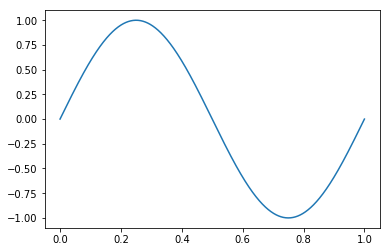

In [25]:
plot_function(s,0,1)

In [26]:
play_waveform(s,440,8192,1000)

In [27]:
play_waveform(s,880,8192,1000)

In [28]:
def square(t):
    if t < 0.5:
        return 1
    else:
        return -1

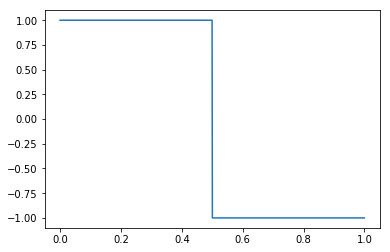

In [29]:
plot_function(square,0,1)

In [30]:
play_waveform(s,880,8192,1000)
play_waveform(square,440,8192,1000)

In [31]:
def triangle(t):
    if t < 0.5:
        return -1+4*t
    else:
        return 1 - 4*(t-0.5)
    
def saw(t):
    return -1 + 2*t

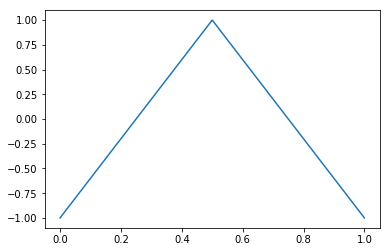

In [32]:
plot_function(triangle,0,1)

In [33]:
play_waveform(saw,441,8192,1000)

In [34]:
list(enumerate([4,5,6]))

[(0, 4), (1, 5), (2, 6)]

In [35]:
def fourier(a,b):
    def wave(t):
        cos_terms = [an*cos(2*pi*n*t) for (n,an) in enumerate(a)]
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)]
        return sum(cos_terms) + sum(sin_terms)
    return wave

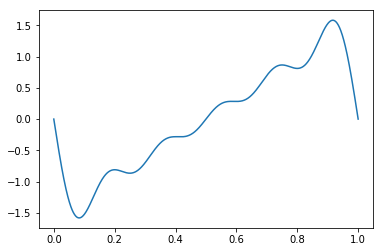

In [36]:
plot_function(fourier([],[-1/n for n in range(1,6)]),0,1)

In [37]:
play_waveform(s(1),441,4096,1000)
play_waveform(fourier([],[-2/(pi*n) for n in range(1,20)]),441,4096,1000)
play_waveform(saw,441,4096,1000)

TypeError: 'float' object is not callable

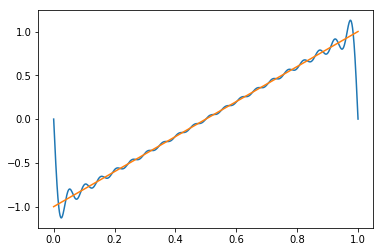

In [38]:
plot_function(fourier([],[-2/(pi*n) for n in range(1,20)]),0,1)
plot_function(saw,0,1)

In [39]:
def inner_product(f,g,N=1000):
    dt = 1/N
    return 2*sum([f(x)*g(x)*dt for x in np.arange(0,1,dt)])
    

In [40]:
inner_product(lambda t:sin(2*pi*t),lambda t:sin(6*pi*t))

-2.566744087730005e-16

In [41]:
np.arange(0,100,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [42]:
def s(n):
    def f(t):
        return sin(2*pi*n*t)
    return f

In [43]:
def c(n):
    def f(t):
        return cos(2*pi*n*t)
    return f

In [44]:
def fourier_series(f,max):
    an = [inner_product(f,c(n)) for n in range(0,max)]
    bn = [inner_product(f,s(n)) for n in range(1,max)]
    return an, bn

In [45]:
fourier_series(saw,10)

([-0.0020000000000000386,
  -0.001999999999999996,
  -0.002000000000000056,
  -0.0019999999999999966,
  -0.001999999999999986,
  -0.00200000000000002,
  -0.001999999999999924,
  -0.0020000000000000044,
  -0.0020000000000003665,
  -0.002000000000000279],
 [-0.6366176779711019,
  -0.31830569738256154,
  -0.21220030756667846,
  -0.15914656542328898,
  -0.12731348232574335,
  -0.10609072872631234,
  -0.09093102052838554,
  -0.07956071567952136,
  -0.0707166797024633])

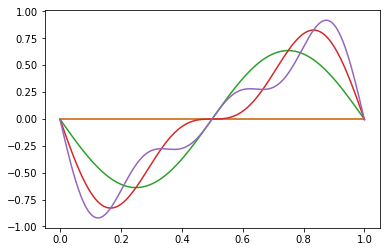

In [46]:
for i in range(0,5):
    plot_function(fourier(*fourier_series(saw,i)),0,1)

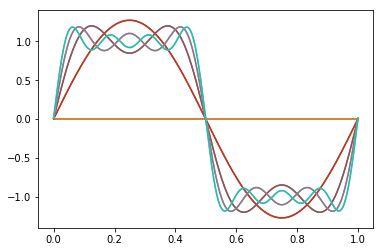

In [47]:
for i in range(0,10):
    plot_function(fourier(*fourier_series(square,i)),0,1)

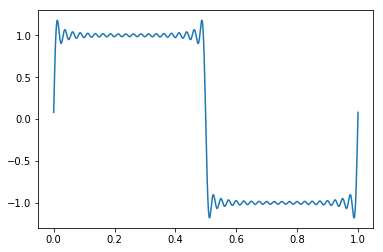

In [48]:
plot_function(fourier(*fourier_series(square,40)),0,1)
play_waveform(fourier(*fourier_series(square,40)),440,4096,1000)
play_waveform(square,440,4096,1000)

<BarContainer object of 39 artists>

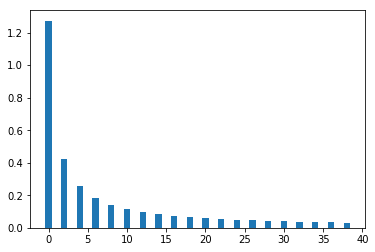

In [49]:
plt.bar(range(0,39), fourier_series(square,40)[1])

In [50]:
def step_down(x):
    if x < 0.5:
        return 1
    else:
        return -1

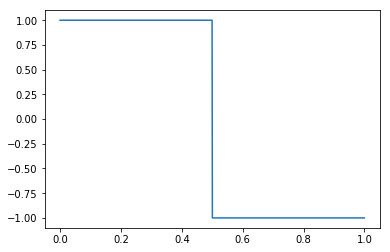

In [51]:
plot_function(step_down,0,1)

In [52]:
h = periodic(step_down,10)

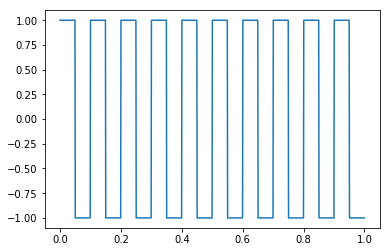

In [53]:
plot_function(h,0,1)

In [54]:
play_waveform(step_down,440,8000,1000)

In [55]:
play_waveform(s(1),440,8000,1000)

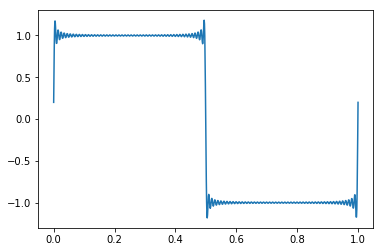

In [56]:
plot_function(fourier(*fourier_series(step_down,100)),0,1)

In [57]:
# for i in range(0,10):
#     play_waveform(fourier(*fourier_series(step_down,10*i)),441,8000,1000)

In [58]:
import random

def lerp_function(steps):
    nsteps = len(steps)
    width = 1/nsteps
    def f(t):
        start_idx = int(t/width)%nsteps
        end_idx = (int(t/width) + 1)%nsteps
        s = (t % width)/width
        y1 = steps[start_idx]
        y2 = steps[end_idx]
        y = y1 + (y2-y1)*s
        return y
    return f
    
def random_step_function(nsteps):
    steps = [2*random.random()-1 for _ in range(0,nsteps)]
    width = 1/nsteps
    def f(t):
        return steps[int(t/width)%nsteps]
    return f

def random_lerp_function(nsteps):
    steps = [2*random.random()-1 for _ in range(0,nsteps)]
    return lerp_function(steps)

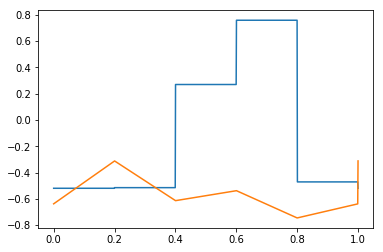

In [59]:
f = random_step_function(5)
g = random_lerp_function(5)
plot_function(f,0,1)
plot_function(g,0,1)

In [60]:
def fourier_approx(f,n):
    return fourier(*fourier_series(f,n))

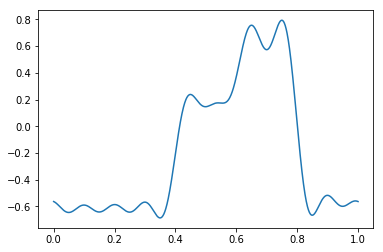

In [61]:
plot_function(fourier_approx(f,10),0,1)

In [62]:
play_waveform(f,441,8000,1000)

In [63]:
play_waveform(fourier_approx(f,20),441,8000,1000)

In [64]:
def stretch(l):
    ma = max(l)
    mi = min(l)
    return [2*(li - mi)/(ma-mi) -1 for li in l]  

def random_walk(n):
    l = [0]
    for i in range(0,n-1):
        l.append(np.random.normal(l[-1], 0.01))
    return stretch(l)
    

In [65]:
# def rwf(pts):
# plt.scatter(range(0,100),random_walk(1000))

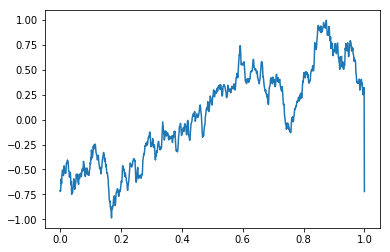

In [66]:
h = lerp_function(random_walk(1000))
plot_function(h,0,1)

In [67]:
play_waveform(h,441,8000,1000)
play_waveform(fourier_approx(h,50),441,8000,1000)

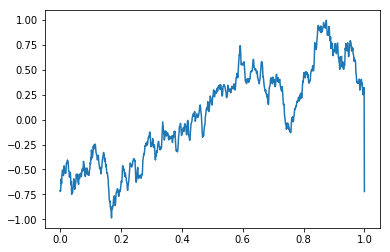

In [68]:
plot_function(h,0,1)

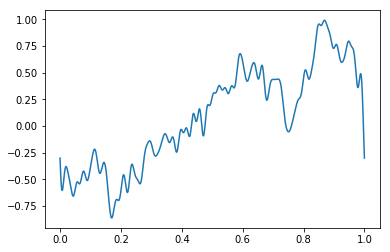

In [69]:
plot_function(fourier_approx(h,50),0,1)

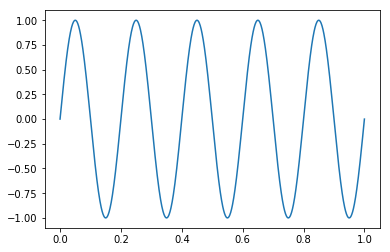

In [72]:
plot_function(s(2),0,1)

In [71]:
# play_waveform(c(1),441,8000,1000)
# play_waveform(c(2),441,8000,1000)
# play_waveform(c(3),441,8000,1000)
# play_waveform(c(4),441,8000,1000)
# play_waveform(c(5),441,8000,1000)

In [78]:
for i in range(0,20):
    play_waveform(s(2),int(200 * (2**(i/12))),8000,250)

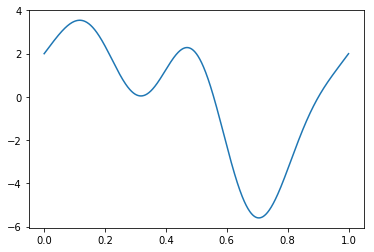

In [83]:
plot_function(fourier([0,1,2,-1],[3]),0,1)

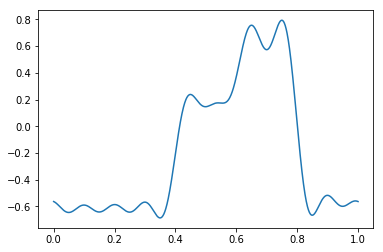

In [86]:
plot_function(fourier_approx(f,10),0,1)

In [90]:
fourier_series(f,10)

([-0.19200838485519997,
  -0.43006110960013744,
  -0.06973108399730611,
  0.04821113489673002,
  0.10667645468716973,
  -0.0009783532863773233,
  -0.07222429437483169,
  -0.019181092746854724,
  0.01872266985688992,
  0.04703109883461053],
 [-0.46227355984095186,
  0.21230801720778184,
  0.14234605921095092,
  -0.11796772308947429,
  3.367125371925295e-17,
  -0.07543331134489605,
  0.06030341166436033,
  0.05367378874004726,
  -0.05348798456644953])

Text(0,0.5,'"Pressure"')

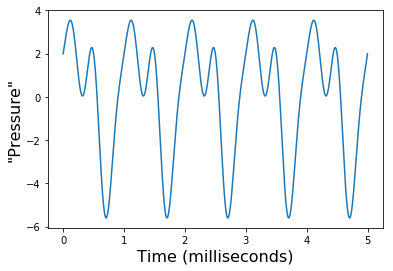

In [111]:
plot_function(fourier([0,1,2,-1],[3]),0,5)
plt.xlabel("Time (milliseconds)",fontsize=16)
plt.ylabel("\"Pressure\"",fontsize=16)

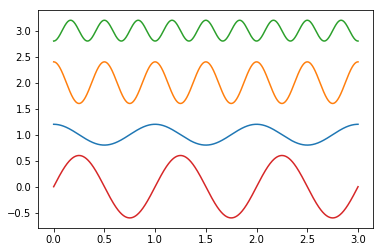

In [107]:
for k,a in enumerate([0,1,2,-1]):
    if k > 0:
        plot_function(lambda x:k + a*cos(2*pi*k*x) / 5,0,3)
        
plot_function(lambda x: 3*sin(2*pi*x)/5,0,3)

In [120]:
play_waveform(s(1),250,8000,1000)

In [121]:
play_waveform(s(1),500,8000,1000)